# L05 Assignment

## Author - Shuyang Ren



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Read the .csv file with the pandas read_csv method
auto_data = pd.read_csv(fileName)

In [2]:
auto_data.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
auto_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
# Data preperation (using code from assignment 4)
# remove rows with '?' (aka missing)
for column in auto_data:
    if not is_numeric_dtype(auto_data[column]):
        auto_data.loc[auto_data[column] == '?', column] = np.nan
        auto_data.dropna(axis = 0, inplace = True)
# convert price, horsepower, and peak rpm to numeric
for column in ['price', 'horsepower', 'peak-rpm']:
    auto_data[column] = pd.to_numeric(auto_data[column])
# add 'log price' to the df for analysis
auto_data['log-price'] = np.log(auto_data.price)

C:\Users\shuya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


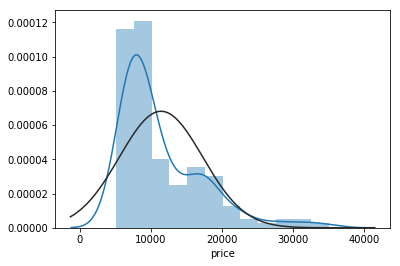

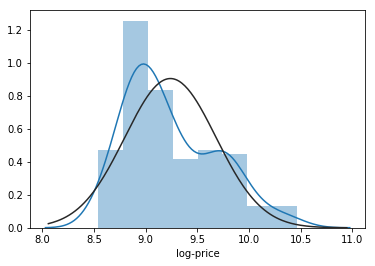

In [5]:
sns.distplot(auto_data['price'], fit=stats.norm)
plt.show()
sns.distplot(auto_data['log-price'], fit=stats.norm)
plt.show()

In [6]:
# from the above results, we see they both are skewed to the right and that price is more skewed than log price.
stats.normaltest(auto_data['price'])

NormaltestResult(statistic=53.77206230415133, pvalue=2.1064202945306713e-12)

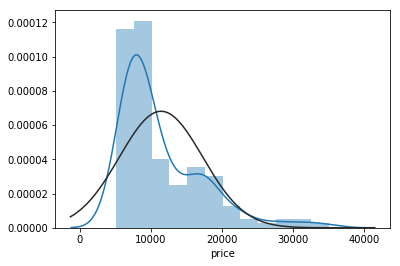

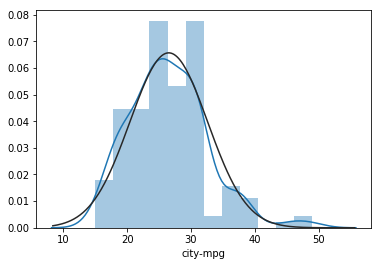

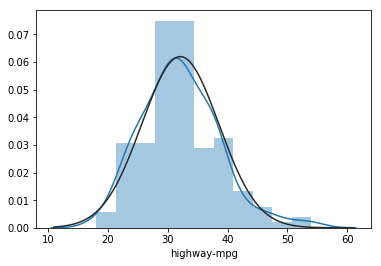

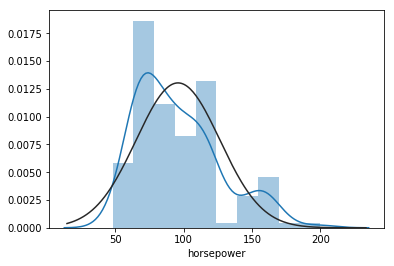

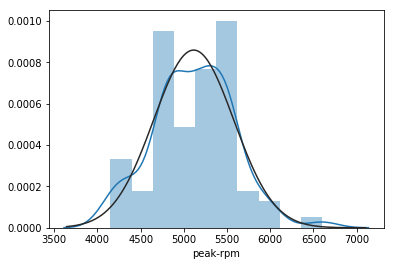

In [7]:
# Repeating this for other variables
col = ["price", "city-mpg", "highway-mpg", "horsepower", "peak-rpm"]
for column in col:
    sns.distplot(auto_data[column], fit=stats.norm)
    plt.show()

While price seem to have a non-normal distribution skewing right, highway MPG and city-MPG seem to both have a relatively normal distribution. I believe horsepower and peak-rpm to have bimodel distributions.

In [8]:
# Basic statistics
for column in col:
    print(str(column), ":\n", auto_data.loc[:, column].describe(), "\n")

price :
 count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64 

city-mpg :
 count    159.000000
mean      26.522013
std        6.097142
min       15.000000
25%       23.000000
50%       26.000000
75%       31.000000
max       49.000000
Name: city-mpg, dtype: float64 

highway-mpg :
 count    159.000000
mean      32.081761
std        6.459189
min       18.000000
25%       28.000000
50%       32.000000
75%       37.000000
max       54.000000
Name: highway-mpg, dtype: float64 

horsepower :
 count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64 

peak-rpm :
 count     159.000000
mean     5113.836478
std       465.754864
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
m

Max value of log price:  10.464702061835247
Min value of log price:  8.540519016719735
Log price mean:  9.239539227854157
Normed log price mean:  2.5590989844347164e-15
Normed log price standard deviation:  0.22917883739821263
95% confidence interval for mean:  (-0.0360108451751402, 0.03601084517514532)
95% confidence interval for standard deviation (0.19316799222306985, 0.2651896825733554)


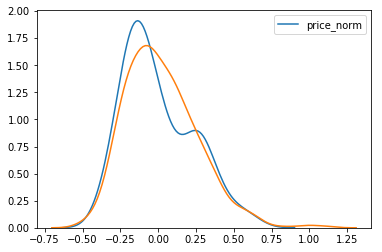

In [9]:
# Data normalization for price
auto_data.loc[:,"log price"] = np.log(auto_data.loc[:,"price"])
maxy = np.max(auto_data.loc[:,"log price"])
print("Max value of log price: ", maxy)
miny = np.min(auto_data.loc[:,"log price"])
print("Min value of log price: ", miny)
meany = np.mean(auto_data.loc[:,"log price"])
print("Log price mean: ", meany)
auto_data.loc[:,"price_norm"] = (auto_data.loc[:,"log price"] - meany) / (maxy - miny)
meen = np.mean(auto_data.loc[:,"price_norm"])
print("Normed log price mean: ", meen)
standy = np.std(auto_data.loc[:,"price_norm"])
print("Normed log price standard deviation: ", standy)
sns.kdeplot(auto_data.loc[:,"price_norm"])
sns.kdeplot(np.random.lognormal(meen,standy,1000)-1)
print("95% confidence interval for mean: ", 
      scipy.stats.t.interval(0.95, len(auto_data)-1, loc=np.mean(auto_data.loc[:,"price_norm"]), 
                          scale=scipy.stats.sem(auto_data.loc[:,"price_norm"])))
print("95% confidence interval for standard deviation", 
      scipy.stats.t.interval(0.95, len(auto_data)-1, loc=np.std(auto_data.loc[:,"price_norm"]), 
                          scale=scipy.stats.sem(auto_data.loc[:,"price_norm"])))

Text(0.5, 1.0, 'Normal Distribution vs Normed Log Price distribution')

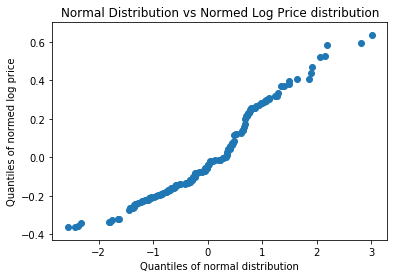

In [10]:
# Q-Q plot of log price and price
norm1 = np.random.normal(size = len(auto_data)).tolist()
log_price = auto_data.loc[:,"price_norm"]
log_price_norm = (log_price - log_price.mean()) / (log_price.max() - log_price.min())
plt.scatter(x = sorted(norm1), y = sorted(log_price_norm))
plt.xlabel('Quantiles of normal distribution')
plt.ylabel('Quantiles of normed log price')
plt.title('Normal Distribution vs Normed Log Price distribution')

Statistics of log Standard aspiration 
 count    132.000000
mean      -0.044867
std        0.205333
min       -0.363282
25%       -0.191761
50%       -0.099942
75%        0.073588
max        0.636718
Name: log std price, dtype: float64
Statistics of log Turbo aspiration
 count    27.000000
mean      0.219351
std       0.220414
min      -0.151749
25%       0.033172
50%       0.294612
75%       0.371373
max       0.582779
Name: log turbo price, dtype: float64


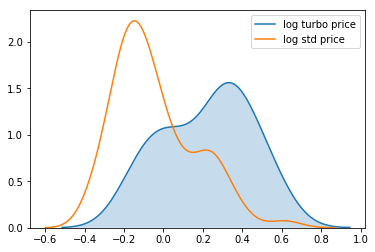

In [11]:
# The focus will be on price of cars with turbo aspiration vs those with standard aspiration
auto_data.loc[:,"std"] = auto_data.loc[:,"aspiration"].isin(['std']).astype(int)
auto_data.loc[:,"turbo"] = auto_data.loc[:,"aspiration"].isin(['turbo']).astype(int)
auto_std = auto_data.query('std == 1')
auto_turbo = auto_data.query('turbo == 1')
auto_std.columns = auto_std.columns.str.replace('price_norm','log std price')
auto_turbo.columns = auto_turbo.columns.str.replace('price_norm','log turbo price')
sns.kdeplot( auto_turbo.loc[:,"log turbo price"], shade = True )
sns.kdeplot( auto_std.loc[:,"log std price"] )
print("Statistics of log Standard aspiration \n", auto_std.loc[:,"log std price"].describe())
print("Statistics of log Turbo aspiration\n", auto_turbo.loc[:,"log turbo price"].describe())

The mean of the bootstrapped sampling for turbo aspiration is  0.2182763803508467
The 95% confidence interval for the turbo aspiration is from  -0.1401755218050499 to  0.5448991841519399
The mean of the bootstrapped sampling for standard aspiration is  -0.045265421265104626
The 95% confidence interval for the standard aspiration is from  -0.3393445685269602 to  0.3797267025929637


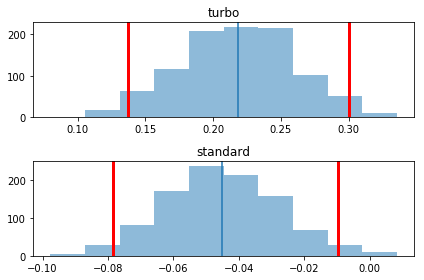

In [12]:
# Confidence intervals of mean via bootstrapping on the normalized prices of turbo and standard cars

n_replicas = 1000
# helper functions
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()

auto_std.columns = auto_std.columns.str.replace('log std price','log_std_price')
auto_turbo.columns = auto_turbo.columns.str.replace('log turbo price','log_turbo_price')
turbo_log_price = auto_turbo.loc[:,"log_turbo_price"]
turbo_log_price_bootstrap_means = pd.Series([
    turbo_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

std_log_price = auto_std.loc[:,"log_std_price"]
std_log_price_bootstrap_means = pd.Series([
    std_log_price.sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])
##
plot_dists(turbo_log_price_bootstrap_means, std_log_price_bootstrap_means, 
           nbins=80, a_label='turbo', b_label='standard')
p = 5
print("The mean of the bootstrapped sampling for turbo aspiration is " , np.mean(turbo_log_price_bootstrap_means)) 
print("The 95% confidence interval for the turbo aspiration is from ", np.percentile(turbo_log_price, p/2.), "to ", np.percentile(turbo_log_price, 100-p/2.))
print("The mean of the bootstrapped sampling for standard aspiration is " , np.mean(std_log_price_bootstrap_means))
print("The 95% confidence interval for the standard aspiration is from ", np.percentile(std_log_price, p/2.), "to ", np.percentile(std_log_price, 100-p/2.))

Mean: 0.00000, Standard deviation: 0.22918
Mean: -0.04487, Standard deviation: 0.20455


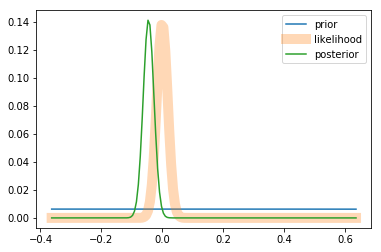

In [13]:
# Repeat via Bayesian statistics
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

N = len(auto_data)
p = np.linspace(np.min(auto_data.loc[:,"price_norm"]), np.max(auto_data.loc[:,"price_norm"]), num=N)

std_mean = np.mean(auto_std.loc[:,"log_std_price"])
pp = scipy.stats.norm.pdf(p, std_mean, scale=5)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean: %.5f, Standard deviation: %.5f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

all_log_prices = comp_like(p, auto_data.loc[:,"price_norm"])
std_log_prices = comp_like(p, auto_std.loc[:,"log_std_price"])

plt.plot(p, pp, label='prior')
plt.plot(p, all_log_prices, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, std_log_prices, label='posterior')
plt.legend()

In [14]:
# Testing population samples via t_test

def t_test(a, b, alpha, alternative='two-sided'):
    import statsmodels.stats.weightstats as ws
    from statistics import mean
    diff = a.mean() - b.mean()

    res = scipy.stats.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   
    
test = t_test(auto_std.loc[:,"log_std_price"], auto_turbo.loc[:,"log_turbo_price"], 0.05)
test

DegFreedom    3.582588e+01
Difference   -2.642186e-01
Statistic    -6.016813e+00
PValue        1.207824e-08
Low95CI      -3.575874e-01
High95CI     -1.708499e-01
dtype: float64

Through T-test we reject the null hypthoesis that the distribution has the same mean.